In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_interp_spline, BSpline
from sklearn.linear_model import ElasticNet

$$\frac{-\Big[\frac{-U}{\lambda(2-q)} + 1\Big]^{\frac{1-q}{2-q}}}{\lambda(1-q)}$$

In [2]:
def inverse_cdf(λ, q, U):
    k = -((-U/(λ*(2-q))) + 1)**((1-q)/(2-q))
    return k/(λ*(1-q))

$$(2-q)\lambda e_{q}(-\lambda x)$$

$$e_{q} = [1 + (1 - q)x]^{1/(1-q)}$$

In [3]:
def eq(x):
    return (1 + (1 - q) * x)**(1/(1-q))

def pdf(λ, q, x):
    return (2 - q) * λ * eq(-λ*x)

In [4]:
# Scott's bin size
def bin_width(σ, n):
    return 3.5 * (σ/(n**(1/3)))

def num_of_bins(data):
    σ = np.std(data)
    n = len(data)
    width = bin_width(σ, n)
    return np.ceil((np.max(data) - np.min(data))/ width), width

In [5]:
def histogram(data, bins):
    sorted_data = np.sort(data)
    X = np.unique(sorted_data)
    j = 0
    count = 0
    Px = []
    for i in range(0, X.shape[0], bins):
        X_min = X[i]
        if (i + bins >= X.shape[0]):
            X_max = X.max() + 1
        else:
            X_max = X[i + bins]
        while((j < sorted_data.shape[0]) and (X_min <= sorted_data[j] < X_max)):
            count += 1
            j += 1
        Px.append(count)
        count = 0
    return X[::bins], np.array(Px)/ len(data)

In [6]:
def histogram_power2(data):
    sorted_data = np.sort(data)
    X = np.unique(sorted_data)
    width = [2**i for i in range(int(np.floor(np.log(X.astype('int').max())/np.log(2))))]
    X_values = []
    x = 0
    for w in width:
        x += w
        X_values.append(x)
    X_values.append(X.astype('int').max())
    j = 0
    count = 0
    CPx = []
    for i in range(1, len(X_values)):
        while((j < sorted_data.shape[0]) and (X_values[i-1] <= sorted_data[j] < X_values[i])):
            count += 1
            j += 1
        CPx.append(count)
        count = 0
    return X, np.array(CPx), X_values

In [49]:
def histogram_power(data, power):
    sorted_data = np.sort(data)
    X = np.unique(sorted_data)
    width = [power**i for i in range(int(np.ceil(np.log(X.astype('int').max())/np.log(power))))]
    x = 0
    X_values = [x]
    for w in width:
        x += w
        X_values.append(x)
    j = 0
    count = 0
    CPx = []
    for i in range(1, len(X_values)):
        while((j < sorted_data.shape[0]) and (X_values[i-1] <= sorted_data[j] < X_values[i])):
            count += 1
            j += 1
        CPx.append(count)
        count = 0
    return X, np.array(CPx), np.array(X_values)

In [8]:
data = np.loadtxt("/home/marcio/qExp13_2.txt", delimiter=',')

In [51]:
power = np.sqrt(3.2)
X, CPx, X_values = histogram_power(data, power)

In [39]:
width = [power**i for i in range(int(np.ceil(np.log(X.astype('int').max())/np.log(power))))]

In [40]:
Px = np.array([CPx[i]/width[i] for i in range(len(CPx))]) / len(data)

In [41]:
λ = 2
q = 1.3
xmin = 2
# α = 1 / (1 - (int_eq(λ, q, 10E7) - int_eq(λ, q, 0)))
fx = pdf(λ, q, X_values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


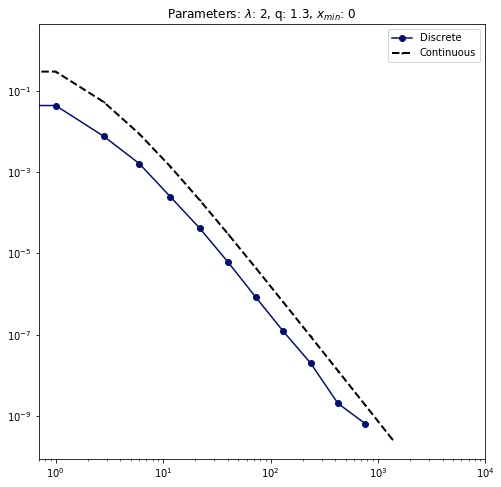

In [48]:
# plot it!
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(X_values[:-1], Px, color='#001072', marker='o', label='Discrete')
ax.plot(X_values, fx, 'go--', color = '#000000',linewidth=2, markersize=1, label='Continuous')
plt.title("Parameters: $\lambda$: " + str(λ) + ", q: " + str(q) + ", $x_{min}$: 0")
ax.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 10000)
plt.savefig("Comparison_cont.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')
plt.show()

In [ ]:
def int_eq(λ, q, x):
    return -(1 - (1 - q) * λ * x) ** ((2 - q) / (1 - q))

In [ ]:
data3 = np.loadtxt("/home/marcio/qExp13_2_3.txt", delimiter=',')
data4 = np.loadtxt("/home/marcio/qExp13_2_4.txt", delimiter=',')
data5 = np.loadtxt("/home/marcio/qExp13_2_5.txt", delimiter=',')
data6 = np.loadtxt("/home/marcio/qExp13_2_6.txt", delimiter=',')
data7 = np.loadtxt("/home/marcio/qExp13_2_7.txt", delimiter=',')

In [ ]:
data3 = np.loadtxt("/home/marcio/qExp13_2_7.txt", delimiter=',')

In [ ]:
power = np.sqrt(3.2)
X3, CPx3, X_values3 = histogram_power(data3, power)
X4, CPx4, X_values4 = histogram_power(data4, power)
X5, CPx5, X_values5 = histogram_power(data5, power)
X6, CPx6, X_values6 = histogram_power(data6, power)
X7, CPx7, X_values7 = histogram_power(data7, power)

In [ ]:
width3 = [power**i for i in range(int(np.floor(np.log(X3.astype('int').max())/np.log(power))))]
width4 = [power**i for i in range(int(np.floor(np.log(X4.astype('int').max())/np.log(power))))]
width5 = [power**i for i in range(int(np.floor(np.log(X5.astype('int').max())/np.log(power))))]
width6 = [power**i for i in range(int(np.floor(np.log(X6.astype('int').max())/np.log(power))))]
width7 = [power**i for i in range(int(np.floor(np.log(X7.astype('int').max())/np.log(power))))]

In [ ]:
Px3 = np.array([CPx3[i]/width3[i] for i in range(len(CPx3))]) / len(data3)
Px4 = np.array([CPx4[i]/width4[i] for i in range(len(CPx4))]) / len(data4)
Px5 = np.array([CPx5[i]/width5[i] for i in range(len(CPx5))]) / len(data5)
Px6 = np.array([CPx6[i]/width6[i] for i in range(len(CPx6))]) / len(data6)
Px7 = np.array([CPx7[i]/width7[i] for i in range(len(CPx7))]) / len(data7)

In [ ]:
1 / (int_eq(λ, q, 10E7)- int_eq(λ, q, 2))

In [ ]:
λ = 2
q = 1.3
xmin = 2
# α = 1 / (1 - (int_eq(λ, q, 10E7) - int_eq(λ, q, 0)))
fx = pdf(λ, q, X_values7)

In [ ]:
Px

In [ ]:
# plot it!
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(X_values[:-1], Px,  label='N = 10E3')
# ax.plot(X_values4, np.append(Px4,0),  label='N = 10E4')
# ax.plot(X_values5[:-1], Px5,  label='N = 10E5')
# ax.plot(X_values6[:-1], Px6,  label='N = 10E6')
# ax.plot(X_values7[:-1], Px7,  label='N = 10E7')

# ax.scatter(X_values[:-1], Px/(len(data)), color='#001072', marker='x', label='Discrete / 10E5')
# ax.plot(X_values[:-1], Px, color='#001072', alpha=0.25, label='Discrete')
plt.title("Parameters: $\lambda$: " + str(λ) + ", q: " + str(q) + ", $x_{min}$: 0")
# ax.plot(X_values7, fx, 'go--', color = '#000000',linewidth=2, markersize=1, label='Continuous')
ax.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 10000)
plt.savefig("Comparison_cont.jpg", format='jpg', dpi=1200, bbox_inches = 'tight')
plt.show()

In [ ]:
from scipy import integrate

In [ ]:
integrate.simps(fx, X_values[:-1])

In [ ]:
integrate.simps(Px, X_values[:-1])

In [ ]:
Px3, np.append(Px4,0), Px5, Px6

In [ ]:
X_values4